In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sksurv.preprocessing import OneHotEncoder

In [85]:
data = pd.read_csv("C:/Users/thoma/Desktop/final project/turnover/turnover.csv")
data

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [87]:
data.drop(columns='industry',inplace=True)
data.drop(columns='profession',inplace=True)


In [108]:
data['has_coach'] = data.coach.apply(lambda c: 1 if c != 'no' else 0)
data[['has_coach','coach']]
data.drop(columns='coach',inplace=True)

In [109]:
data["gender"] = data["gender"].astype("category")
#data["profession"] = data["profession"].astype("category")
data["traffic"] = data["traffic"].astype("category")
#data["coach"] = data["coach"].astype("category")
data["head_gender"] = data["head_gender"].astype("category")
data["greywage"] = data["greywage"].astype("category")
data["way"] = data["way"].astype("category")
#data["industry"] = data["industry"].astype("category")

array([[<AxesSubplot:title={'center':'stag'}>,
        <AxesSubplot:title={'center':'event'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'extraversion'}>,
        <AxesSubplot:title={'center':'independ'}>,
        <AxesSubplot:title={'center':'selfcontrol'}>],
       [<AxesSubplot:title={'center':'anxiety'}>,
        <AxesSubplot:title={'center':'novator'}>,
        <AxesSubplot:title={'center':'has_coach'}>]], dtype=object)

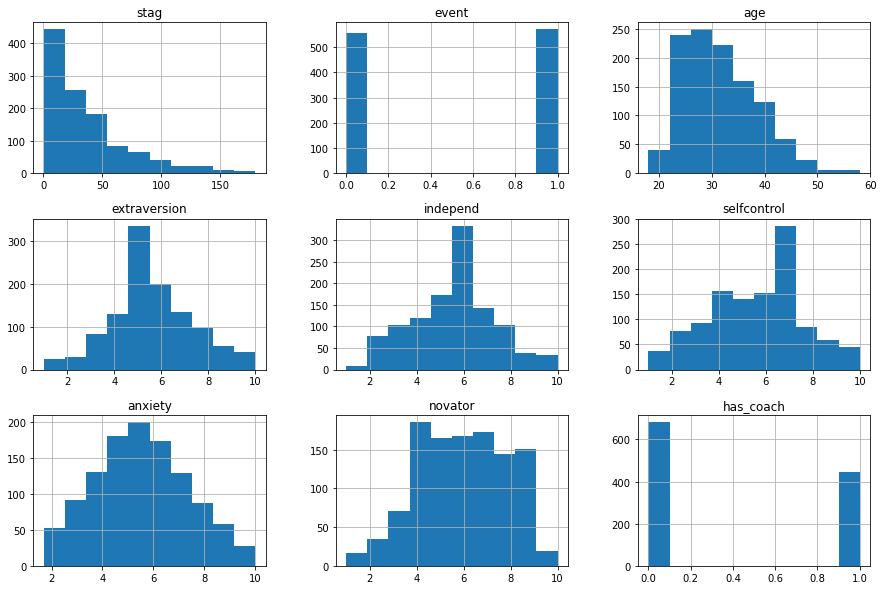

In [123]:
data.hist(figsize=(15, 10))

In [127]:

#Checking if age is a factor that affects employees from resigning
import plotly.express as px
fig = px.histogram(data, x="age", color='event', marginal='box', barmode='group')
fig.show()



In [128]:
fig = px.histogram(data, x="stag", color='event', marginal='box', barmode='group')
fig.show()

In [110]:
# Correlation of numeric variables with the turnover
data.corrwith(data.event)



stag           -0.048361
event           1.000000
age            -0.048751
extraversion    0.015458
independ        0.051864
selfcontrol    -0.040040
anxiety        -0.063232
novator         0.006825
has_coach      -0.020177
dtype: float64

In [111]:
#making dummy 
data_dummy = OneHotEncoder().fit_transform(data)
data_dummy.head()

,stag,event,gender=m,age,traffic=advert,traffic=empjs,traffic=friends,traffic=rabrecNErab,traffic=recNErab,traffic=referal,...,head_gender=m,greywage=white,way=car,way=foot,extraversion,independ,selfcontrol,anxiety,novator,has_coach
0,7.030801,1,1.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,6.2,4.1,5.7,7.1,8.3,0
1,22.965092,1,1.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,6.2,4.1,5.7,7.1,8.3,0
2,15.934292,1,0.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,6.2,6.2,2.6,4.8,8.3,0
3,15.934292,1,0.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,5.4,7.6,4.9,2.5,6.7,0
4,8.410678,1,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,4.1,8.0,7.1,3.7,1


In [112]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(data.stag,data. event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1129 total observations, 558 right-censored observations>

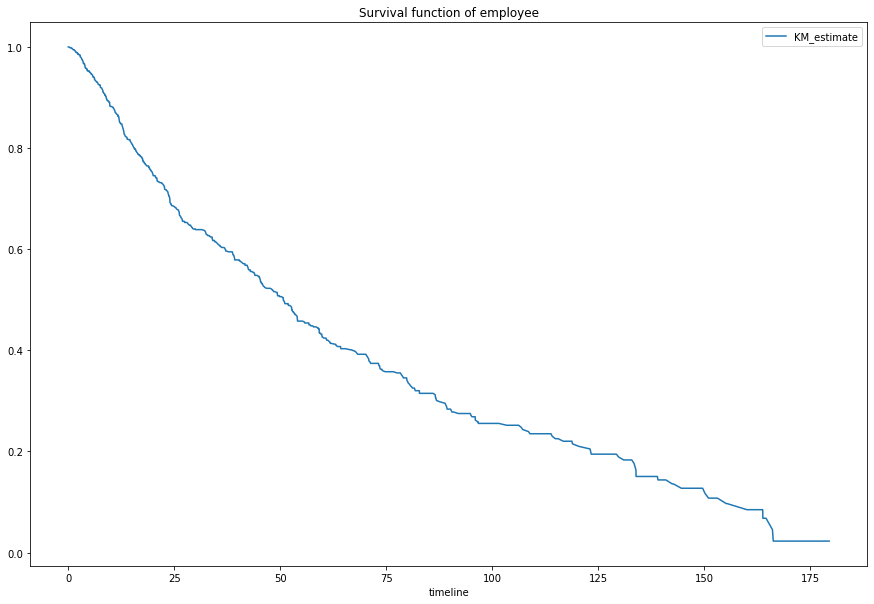

In [96]:

#simple plot of the survival function 
from matplotlib import pyplot as plt
kmf.survival_function_.plot(figsize=(15,10))
plt.title('Survival function of employee');

<AxesSubplot:xlabel='timeline'>

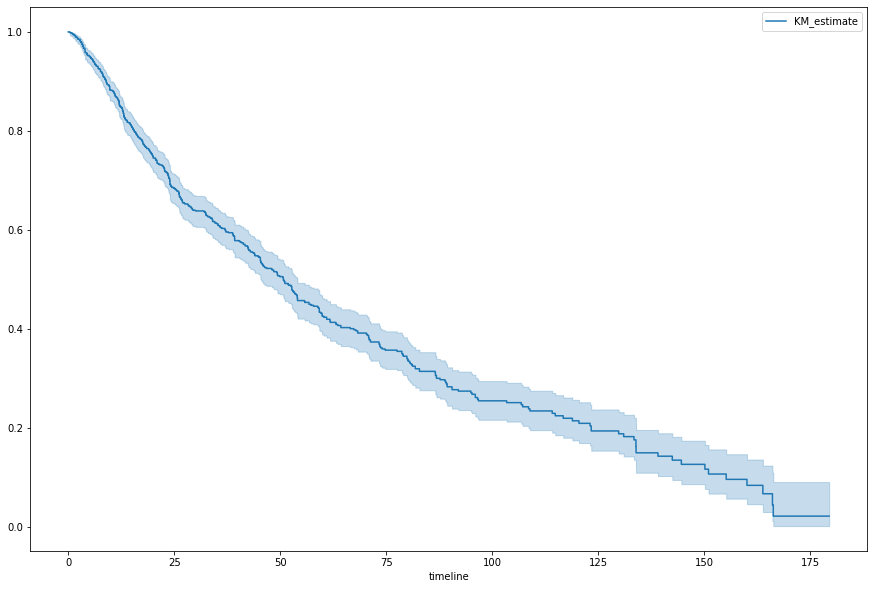

In [95]:
#survival function with i.c 95%
kmf.plot_survival_function(figsize=(15,10))

In [113]:
kmf.median_survival_time_

50.72689938

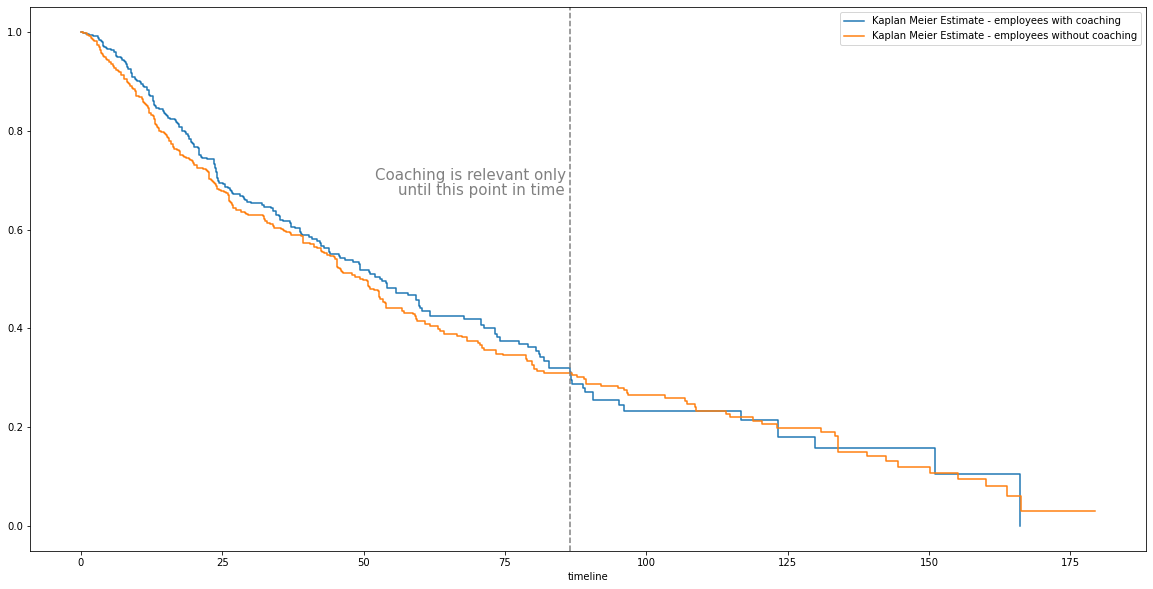

In [124]:
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(20, 10))

cohort1 = data[data.has_coach == 1]
kmf.fit(cohort1.stag, cohort1.event,label='Kaplan Meier Estimate - employees with coaching')
kmf.plot_survival_function(ax=ax,ci_show=False)

cohort2 = data[data.has_coach != 1]
kmf.fit(cohort2.stag, cohort2.event,label='Kaplan Meier Estimate - employees without coaching')
kmf.plot_survival_function(ax=ax,ci_show=False)

plt.text(52,0.7,'Coaching is relevant only',size=15,color='gray')
plt.text(56,0.67,'until this point in time',size=15,color='gray')
plt.axvline(x=86.5,color='gray',linestyle='--')

In [115]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,Kaplan Meier Estimate - employees without coaching_lower_0.95,Kaplan Meier Estimate - employees without coaching_upper_0.95
0.5,44.780287,53.486653


In [116]:
kmf.median_survival_time_

49.87268994

In [117]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data_dummy, duration_col='stag', event_col='event')

cph.print_summary() 


c:\Users\thoma\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3431.12
         time fit was run = 2022-09-04 09:15:51 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
gender=m             -0.04       0.96       0.11            -0.25             0.18                 0.78                 1.19
age                   0.02       1.02       0.01             0.01             0.03                 1.01                 1.04
traffic=advert        0.02       1.02       0.33            -0.63             0.67                 0.53                 1.95
traffic=empjs         0.62       1.86       0.20             0.24             1.01                 1.27                 2.74
traffic=friends       0.02       1.02       0.23            -0.44             0.47                 0.65                 1.60
traffic=rabrecNErab   0.38       1.46       0.19             0.00             0.76                 1.00                 2.14
traffic=recNErab      0.02       1.02       0.29            -0.55             0.58                 0.58                 1.79
traffic=referal       0.20       1.22       0.22            -0.22             0.62                 0.80                 1.86
traffic=youjs         0.39       1.48       0.20             0.01             0.78                 1.01                 2.17
head_gender=m         0.07       1.08       0.09            -0.11             0.25                 0.90                 1.29
greywage=white       -0.54       0.58       0.13            -0.80            -0.29                 0.45                 0.75
way=car              -0.21       0.81       0.10            -0.40            -0.02                 0.67                 0.98
way=foot             -0.31       0.73       0.17            -0.64             0.01                 0.53                 1.01
extraversion          0.04       1.04       0.03            -0.03             0.10                 0.97                 1.11
independ              0.01       1.01       0.03            -0.06             0.07                 0.94                 1.07
selfcontrol          -0.06       0.94       0.03            -0.12             0.01                 0.88                 1.01
anxiety              -0.04       0.96       0.03            -0.11             0.02                 0.90                 1.02
novator              -0.01       0.99       0.03            -0.07             0.04                 0.93                 1.04
has_coach            -0.03       0.97       0.09            -0.21             0.15                 0.81                 1.17

                      cmp to     z      p   -log2(p)
covariate                                           
gender=m                0.00 -0.36   0.72       0.48
age                     0.00  3.23 <0.005       9.68
traffic=advert          0.00  0.05   0.96       0.06
traffic=empjs           0.00  3.17 <0.005       9.38
traffic=friends         0.00  0.07   0.94       0.09
traffic=rabrecNErab     0.00  1.98   0.05       4.38
traffic=recNErab        0.00  0.06   0.96       0.06
traffic=referal         0.00  0.92   0.36       1.48
traffic=youjs           0.00  2.01   0.04       4.49
head_gender=m           0.00  0.81   0.42       1.27
greywage=white          0.00 -4.19 <0.005      15.15
way=car                 0.00 -2.19   0.03       5.13
way=foot                0.00 -1.88   0.06       4.07
extraversion            0.00  1.08   0.28       1.83
independ                0.00  0.17   0.86       0.21
selfcontrol             0.00 -1.75   0.08       3.66
anxiety                 0.00 -1.32   0.19       2.42
novator

<AxesSubplot:>

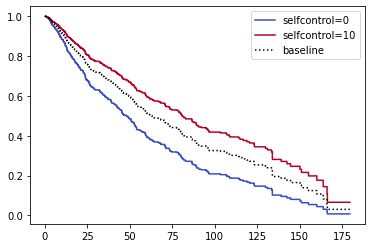

In [118]:
cph.plot_partial_effects_on_outcome(covariates='selfcontrol', values=[0,10], cmap='coolwarm')


<AxesSubplot:>

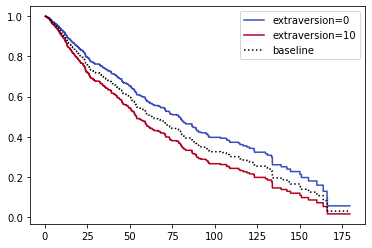

In [119]:
cph.plot_partial_effects_on_outcome(covariates='extraversion', values=[0,10], cmap='coolwarm')

<AxesSubplot:>

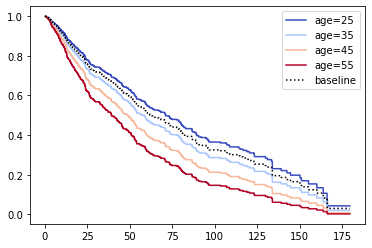

In [120]:
cph.plot_partial_effects_on_outcome(covariates='age', values=[25,35,45,55], cmap='coolwarm')

In [121]:

# filter down to just censored subjects
censored_subjects = data_dummy.loc[~data_dummy['event'].astype(bool)]
censored_subjects_last_obs = censored_subjects['stag']

In [122]:
prediction = censored_subjects.copy()
prediction['median_remaining_lifetime'] = cph.predict_median(censored_subjects, conditional_after=censored_subjects_last_obs)
prediction.sort_values(['median_remaining_lifetime','stag'])

,stag,event,gender=m,age,traffic=advert,traffic=empjs,traffic=friends,traffic=rabrecNErab,traffic=recNErab,traffic=referal,...,greywage=white,way=car,way=foot,extraversion,independ,selfcontrol,anxiety,novator,has_coach,median_remaining_lifetime
366,164.566735,0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.8,4.8,4.9,6.3,5.2,0,1.708419
675,163.778234,0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,5.4,7.6,5.7,7.1,6.0,0,2.266940
674,163.778234,0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,4.6,6.2,8.0,7.1,5.2,0,2.365503
786,155.367557,0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,5.4,6.9,2.6,5.6,8.3,1,10.349076
1127,49.412731,0,0.0,51.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.8,7.6,5.7,6.3,5.2,0,10.480493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,39.293635,0,1.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,3.8,5.5,5.7,7.9,3.7,1,105.166324
310,27.597536,0,0.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3.8,4.1,8.7,7.9,5.2,0,105.823409
1049,25.987680,0,1.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,6.2,6.2,7.2,4.8,5.2,1,108.550308
826,12.320329,0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.2,5.5,8.7,5.6,6.0,0,123.071869
